In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
data = pd.read_csv('./FullDataSet.csv', encoding='latin-1')


/var/folders/cy/1ymz7q691kxczsvbmngmymg40000gn/T/ipykernel_64334/2240076800.py:7: DtypeWarning: Columns (13,14,49,85,108,157,158,159,160,161,163,164,176,177,178) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('./FullDataSet.csv', encoding='latin-1')


In [55]:
# Display the first few rows of the dataset
print(data.head())

            ev_id     ntsb_no ev_type        ev_date ev_dow  ev_time ev_tmzn  \
0  20080107X00026  SEA08LA057     ACC  1/1/2008 0:00     Tu   2230.0     UTC   
1  20080107X00026  SEA08LA057     ACC  1/1/2008 0:00     Tu   2230.0     UTC   
2  20080109X00036  DFW08CA054     ACC  1/1/2008 0:00     Tu   2200.0     UTC   
3  20080109X00036  DFW08CA054     ACC  1/1/2008 0:00     Tu   2200.0     UTC   
4  20080109X00036  DFW08CA054     ACC  1/1/2008 0:00     Tu   2200.0     UTC   

  ev_city ev_state ev_country  ev_site_zipcode  ev_year  ev_month mid_air  \
0  Sonoma       CA        USA            95476     2008         1       Y   
1  Sonoma       CA        USA            95476     2008         1       Y   
2  Arcola       TX        USA            77583     2008         1     NaN   
3  Arcola       TX        USA            77583     2008         1     NaN   
4  Arcola       TX        USA            77583     2008         1     NaN   

  on_ground_collision latitude longitude  wx_obs_time  w

In [56]:
# Display basic information about the dataset
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203194 entries, 0 to 203193
Columns: 182 entries, ev_id to aircraft.engines.eng_time_overhaul
dtypes: bool(2), float64(66), int64(7), object(107)
memory usage: 279.4+ MB
None


In [57]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:


ev_id                                                   0
ntsb_no                                                 0
ev_type                                                 0
ev_date                                                 0
ev_dow                                                  0
ev_time                                               553
ev_tmzn                                               688
ev_city                                                 0
ev_state                                              552
ev_country                                              0
ev_site_zipcode                                         0
ev_year                                                 0
ev_month                                                0
mid_air                                            200733
on_ground_collision                                200733
latitude                                              119
longitude                                             119
wx_obs_time   

In [58]:
print(data.describe())

             ev_time  ev_site_zipcode        ev_year       ev_month  \
count  202641.000000    203194.000000  203194.000000  203194.000000   
mean     1567.919266     60890.757138    2014.057201       6.527378   
std       663.293837     29303.283070       3.543940       3.048082   
min         0.000000       104.000000    2008.000000       1.000000   
25%      1415.000000     33472.000000    2011.000000       4.000000   
50%      1730.000000     67012.000000    2014.000000       7.000000   
75%      2030.000000     86001.000000    2017.000000       9.000000   
max      2359.000000     99929.000000    2021.000000      12.000000   

         wx_obs_time     wx_obs_dir    wx_obs_elev    wx_obs_dist  \
count  187249.000000  203179.000000  176949.000000  203179.000000   
mean     1595.432590     135.454678    1418.042973       8.994064   
std       620.892933     123.299336    6078.071716      24.312022   
min         0.000000       0.000000    -115.000000      -1.000000   
25%      1432.0

In [59]:
#aircraft.Findings.finding_description
#aircraft.Flight_Crew.crew_age
personnel_issues_findings = data['aircraft.Findings.finding_description'].unique()
personnel_issues_findings = [finding for finding in personnel_issues_findings if isinstance(finding, str) and finding.startswith('Personnel issues-Psychological')]

# Print the filtered values
print("Finding Descriptions starting with 'Personnel issues':")
for finding in personnel_issues_findings:
    print(finding)



Finding Descriptions starting with 'Personnel issues':
Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C
Personnel issues-Psychological-Perception/orientation/illusio-Visual illusion/disorientation-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Monitoring other aircraft-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Attention-Maintenance personnel - F
Personnel issues-Psychological-Attention/monitoring-Monitoring other person-Designated examiner - C
Personnel issues-Psychological-Attention/monitoring-Monitoring environment-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Attention-Pilot - F
Personnel issues-Psychological-Attention/monitoring-Monitoring other person-Pilot - C
Personnel issues-Psychological-Attention/monitoring-Task monitoring/vigilance-Pilot - C
Personnel issues-Psychological-Perception/orientation/illusio-Situational awareness-Pilot - F
Personnel issues-Psychological-Perception/orie

In [60]:
# Create a new dataframe with instances of specific psychological findings
all_fatal = data[data['ev_highest_injury'] == 'FATL']
spatial_disorientation = data[data['aircraft.Findings.finding_description'] == 'Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C']
spatial_disorientation_fatal = spatial_disorientation[data['ev_highest_injury'] == 'FATL']

#pritn the number of instances in each dataframe
print("Total Fatal")
print(len(all_fatal))
# print(all_fatal.info())
print("All Spatial Disorientation")
print(len(spatial_disorientation))
print("Fatal Spatial Disorientation")
print(len(spatial_disorientation_fatal))

Total Fatal
47258
All Spatial Disorientation
282
Fatal Spatial Disorientation
260


/var/folders/cy/1ymz7q691kxczsvbmngmymg40000gn/T/ipykernel_64334/122176762.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  spatial_disorientation_fatal = spatial_disorientation[data['ev_highest_injury'] == 'FATL']


In [61]:
print(spatial_disorientation_fatal.head())

              ev_id     ntsb_no ev_type         ev_date ev_dow  ev_time  \
187  20080129X00119  DFW08FA056     ACC  1/17/2008 0:00     Th    443.0   
188  20080129X00119  DFW08FA056     ACC  1/17/2008 0:00     Th    443.0   
199  20080129X00119  DFW08FA056     ACC  1/17/2008 0:00     Th    443.0   
200  20080129X00119  DFW08FA056     ACC  1/17/2008 0:00     Th    443.0   
211  20080129X00119  DFW08FA056     ACC  1/17/2008 0:00     Th    443.0   

    ev_tmzn ev_city ev_state ev_country  ev_site_zipcode  ev_year  ev_month  \
187     UTC   Tulsa       OK        USA            74115     2008         1   
188     UTC   Tulsa       OK        USA            74115     2008         1   
199     UTC   Tulsa       OK        USA            74115     2008         1   
200     UTC   Tulsa       OK        USA            74115     2008         1   
211     UTC   Tulsa       OK        USA            74115     2008         1   

    mid_air on_ground_collision latitude longitude  wx_obs_time  wx_obs_di

In [62]:
# Set display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Missing Values in Spatial Disorientation Fatal")
missing_values = spatial_disorientation_fatal.isnull().sum()
print(missing_values[missing_values > 0])

Missing Values in Spatial Disorientation Fatal
mid_air                                     260
on_ground_collision                         260
wx_obs_time                                   7
wx_obs_fac_id                                 4
wx_obs_elev                                  20
wx_obs_tmzn                                  12
light_cond                                    2
sky_cond_nonceil                            138
sky_cond_ceil                                 3
vis_sm                                        3
wind_vel_kts                                 46
aircraft.flight_plan_activated               32
aircraft.acft_expl                            6
aircraft.acft_series                        234
aircraft.cert_max_gr_wt                      38
aircraft.acft_reg_cls                       260
aircraft.fc_seats                           156
aircraft.cc_seats                           251
aircraft.pax_seats                          190
aircraft.total_seats                     

In [63]:
# Iterate through each column in the spatial_disorientation_fatal dataframe
for column in spatial_disorientation_fatal.columns:
    print(f"\n{column}:")
    # Get the first 3 values for the current column
    values = spatial_disorientation_fatal[column].head(3).tolist()
    # Print each value on a new line
    for value in values:
        print(value)



ev_id:
20080129X00119
20080129X00119
20080129X00119

ntsb_no:
DFW08FA056
DFW08FA056
DFW08FA056

ev_type:
ACC
ACC
ACC

ev_date:
1/17/2008 0:00
1/17/2008 0:00
1/17/2008 0:00

ev_dow:
Th
Th
Th

ev_time:
443.0
443.0
443.0

ev_tmzn:
UTC
UTC
UTC

ev_city:
Tulsa
Tulsa
Tulsa

ev_state:
OK
OK
OK

ev_country:
USA
USA
USA

ev_site_zipcode:
74115
74115
74115

ev_year:
2008
2008
2008

ev_month:
1
1
1

mid_air:
nan
nan
nan

on_ground_collision:
nan
nan
nan

latitude:
361333N
361333N
361333N

longitude:
0955322W
0955322W
0955322W

wx_obs_time:
446.0
446.0
446.0

wx_obs_dir:
150.0
150.0
150.0

wx_obs_fac_id:
KTUL
KTUL
KTUL

wx_obs_elev:
677.0
677.0
677.0

wx_obs_dist:
1.0
1.0
1.0

wx_obs_tmzn:
UTC
UTC
UTC

light_cond:
NITE
NITE
NITE

sky_cond_nonceil:
nan
nan
nan

sky_nonceil_ht:
0.0
0.0
0.0

sky_ceil_ht:
800.0
800.0
800.0

sky_cond_ceil:
OVC
OVC
OVC

vis_sm:
3.0
3.0
3.0

wx_temp:
32.0
32.0
32.0

wx_dew_pt:
34.0
34.0
34.0

wind_dir_deg:
300.0
300.0
300.0

wind_dir_ind:
U
U
U

wind_vel_kts:
18.0
18.0


2.0

aircraft.Findings.finding_code:
202202544.0
202202544.0
202202544.0

aircraft.Findings.finding_description:
Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C
Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C
Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C

aircraft.Findings.category_no:
2.0
2.0
2.0

aircraft.Findings.subcategory_no:
2.0
2.0
2.0

aircraft.Findings.section_no:
20.0
20.0
20.0

aircraft.Findings.subsection_no:
25.0
25.0
25.0

aircraft.Findings.modifier_no:
44.0
44.0
44.0

aircraft.Findings.Cause_Factor:
C
C
C

aircraft.Findings.lchg_userid:
nan
nan
nan

aircraft.Flight_Crew.Aircraft_Key:
1.0
1.0
1.0

aircraft.Flight_Crew.crew_no:
1.0
1.0
1.0

aircraft.Flight_Crew.crew_category:
PLT
PLT
PLT

aircraft.Flight_Crew.crew_age:
31.0
31.0
31.0

aircraft.Flight_Crew.crew_sex:
M
M
M

aircraft.Flight_Crew.crew_city:
Detroit
Detroit
Detroit

air

Important Columns
vis_sm
wx_temp
wx_dew_pt
wind_vel_kts
gust_kts
altimeter
aircraft.Events_Sequence.Occurrence_Description
aircraft.Findings.finding_description
aircraft.second_pilot
aircraft.date_last_insp
aircraft.total_seats
ev_highest_injury
light_cond
ev_state
ev_city
ev_id


In [73]:
important_columns = [
    'vis_sm',
    'wx_temp',
    'wx_dew_pt',
    'wind_vel_kts',
    'gust_kts',
    'altimeter',
    'aircraft.Events_Sequence.Occurrence_Description',
    'aircraft.Findings.finding_description',
    'aircraft.second_pilot',
    'aircraft.date_last_insp',
    'aircraft.total_seats',
    'aircraft.Flight_Crew.crew_age',
    'ev_highest_injury',
    'light_cond',
    'ev_state',
    'ev_city',
    'ev_id'
]

spatial_disorientation_fatal_important = spatial_disorientation_fatal[important_columns]
all_fatal_important = all_fatal[important_columns]

print(spatial_disorientation_fatal_important.head())
print(all_fatal_important.head())



     vis_sm  wx_temp  wx_dew_pt  wind_vel_kts  gust_kts  altimeter  \
187     3.0     32.0       34.0          18.0      21.0       30.0   
188     3.0     32.0       34.0          18.0      21.0       30.0   
199     3.0     32.0       34.0          18.0      21.0       30.0   
200     3.0     32.0       34.0          18.0      21.0       30.0   
211     3.0     32.0       34.0          18.0      21.0       30.0   

    aircraft.Events_Sequence.Occurrence_Description  \
187    Initial climb Attempted remediation/recovery   
188    Initial climb Attempted remediation/recovery   
199         Initial climb Loss of control in flight   
200         Initial climb Loss of control in flight   
211       Initial climb Flight instrument malf/fail   

                                                              aircraft.Findings.finding_description  \
187  Personnel issues-Psychological-Perception/orientation/illusio-Spatial disorientation-Pilot - C   
188  Personnel issues-Psychological-Percep

Spatial Disorientation Fatal Important
Missing values in the subset:
                                                 Missing Values  Percentage
wind_vel_kts                                                 46   17.692308
aircraft.date_last_insp                                      26   10.000000
aircraft.total_seats                                         11    4.230769
aircraft.second_pilot                                         5    1.923077
aircraft.Flight_Crew.crew_age                                 5    1.923077
vis_sm                                                        3    1.153846
light_cond                                                    2    0.769231
aircraft.Events_Sequence.Occurrence_Description               0    0.000000
aircraft.Findings.finding_description                         0    0.000000
wx_temp                                                       0    0.000000
altimeter                                                     0    0.000000
gust_kts           

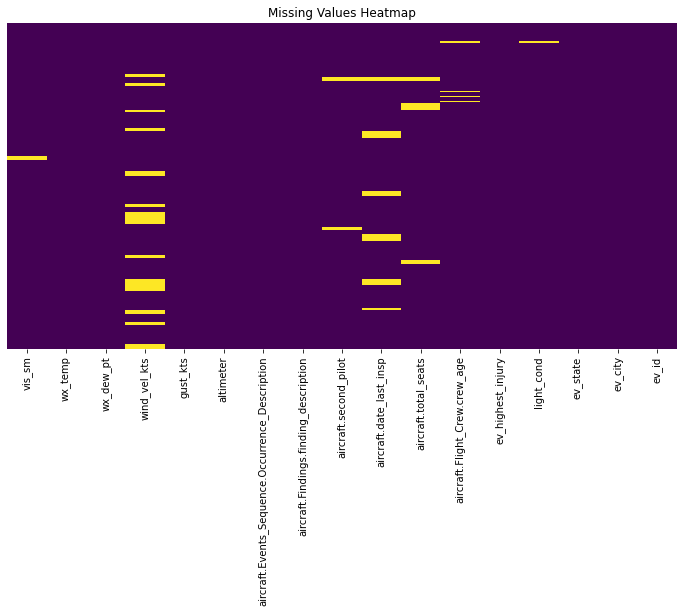

All Fatal Important
Missing values in the subset:
                                                 Missing Values  Percentage
wind_vel_kts                                               8322   17.609717
aircraft.date_last_insp                                    8073   17.082822
aircraft.total_seats                                       4186    8.857760
aircraft.Flight_Crew.crew_age                              1781    3.768674
vis_sm                                                     1288    2.725464
aircraft.second_pilot                                       705    1.491811
aircraft.Findings.finding_description                       587    1.242118
ev_state                                                    255    0.539591
light_cond                                                  174    0.368192
aircraft.Events_Sequence.Occurrence_Description               2    0.004232
wx_temp                                                       0    0.000000
altimeter                             

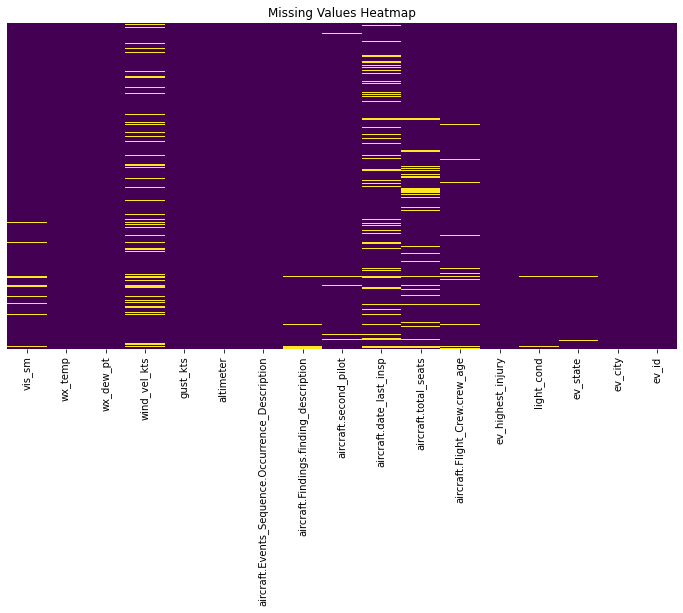

In [74]:
def check_missing_values(data):
    # Check for missing values in the subset
    missing_values = data.isnull().sum()

    # Calculate the percentage of missing values
    total_rows = len(data)
    missing_percentage = (missing_values / total_rows) * 100

    # Combine the count and percentage into a DataFrame
    missing_data = pd.DataFrame({
        'Missing Values': missing_values,
        'Percentage': missing_percentage
    })

    # Sort the results by the number of missing values in descending order
    missing_data_sorted = missing_data.sort_values('Missing Values', ascending=False)

    # Display the results
    print("Missing values in the subset:")
    print(missing_data_sorted)

    plt.figure(figsize=(12, 6))
    sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
print("Spatial Disorientation Fatal Important")
check_missing_values(spatial_disorientation_fatal_important)
print("All Fatal Important")
check_missing_values(all_fatal_important)

Spatial Disorientation Fatal Important
                                    mean  median         var        std  mode
vis_sm                          6.369650     8.0   13.980013   3.738986  10.0
wx_temp                        51.626923    52.0  246.273404  15.693101  39.0
wx_dew_pt                      46.384615    46.0  281.002079  16.763117  46.0
wind_vel_kts                    7.425234     6.0   20.752600   4.555502   4.0
gust_kts                        2.015385     0.0   40.625245   6.373794   0.0
altimeter                      29.524615    30.0   13.717864   3.703763  30.0
aircraft.total_seats            4.325301     4.0    2.413914   1.553677   4.0
aircraft.Flight_Crew.crew_age  53.066667    52.0  155.196325  12.457782  45.0


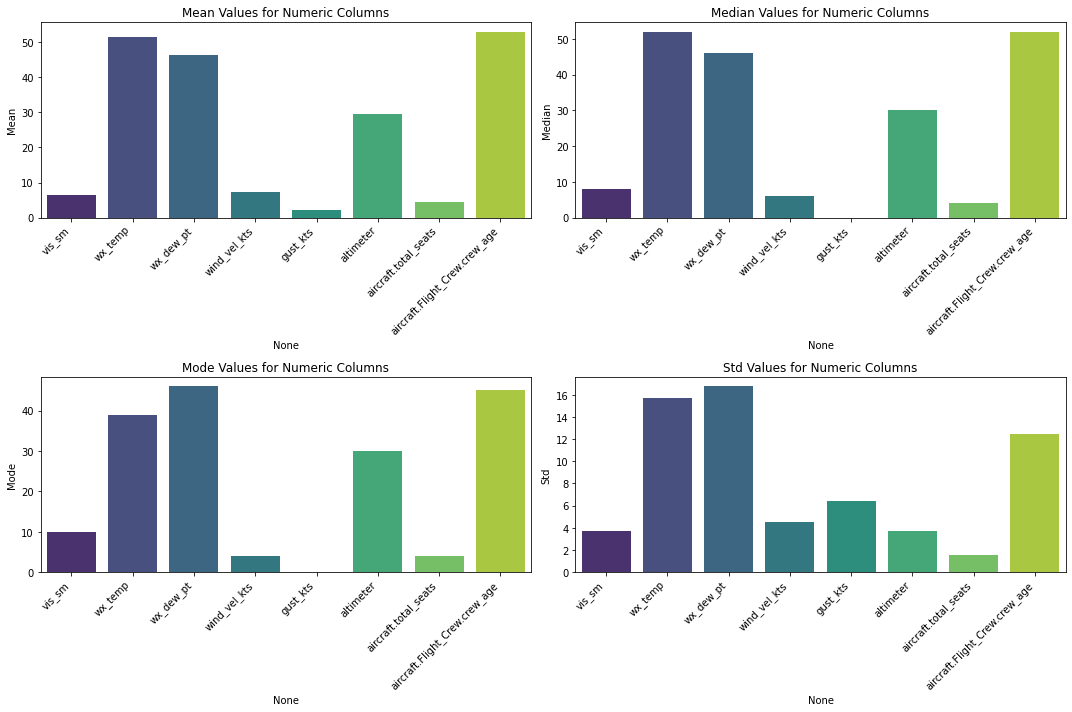

All Fatal Important
                                    mean  median          var        std  \
vis_sm                          9.080147   10.00    12.929114   3.595708   
wx_temp                        62.041707   66.00   469.703003  21.672633   
wx_dew_pt                      45.943544   48.00  2117.881824  46.020450   
wind_vel_kts                    8.095850    7.00    18.310885   4.279122   
gust_kts                        3.375090    0.00    62.971817   7.935478   
altimeter                      30.064455   30.01  3947.770354  62.831285   
aircraft.total_seats            5.176913    4.00   164.115203  12.810746   
aircraft.Flight_Crew.crew_age  52.521802   54.00   250.736116  15.834649   

                                    mode  
vis_sm                         10.000000  
wx_temp                        64.000000  
wx_dew_pt                       0.000000  
wind_vel_kts                    7.000000  
gust_kts                        0.000000  
altimeter                      30.040

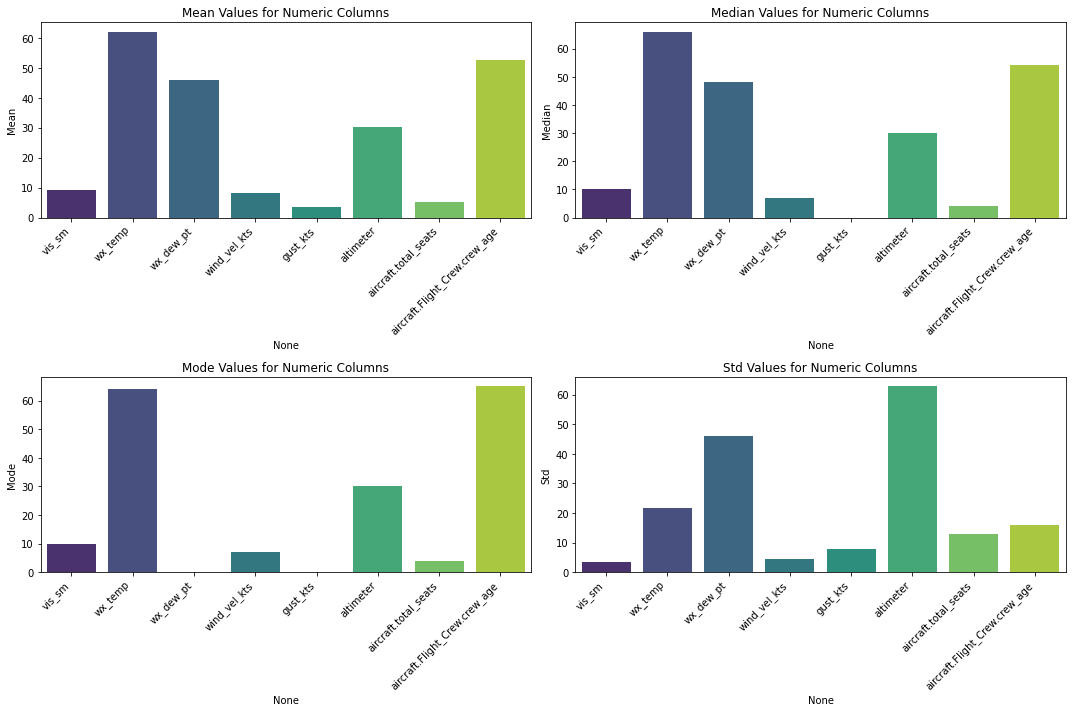

In [75]:
# Determine which important columns are numerical
def is_numeric(column):
    return pd.api.types.is_numeric_dtype(data[column])

def visualize_stats(stats):
    # Visualize the statistics for numeric columns

    plt.figure(figsize=(15, 10))

    stats_to_plot = ['mean', 'median', 'mode', 'std']

    for i, stat in enumerate(stats_to_plot, 1):
        plt.subplot(n_rows, n_cols, i)
        
        data_to_plot = stats.loc[stat].dropna()
        sns.barplot(x=data_to_plot.index, y=data_to_plot.values, palette='viridis', hue=data_to_plot.index)
        
        plt.title(f'{stat.capitalize()} Values for Numeric Columns')
        plt.xticks(rotation=45, ha='right')
        plt.ylabel(stat.capitalize())
        
    plt.tight_layout()
    plt.show()

def calculate_stats(data):
    numeric_columns = [col for col in important_columns if is_numeric(col)]

    stats = data[numeric_columns].agg(['mean', 'median', 'var', 'std'])

    mode_stats = data[numeric_columns].mode().iloc[0]
    stats.loc['mode'] = mode_stats

    return stats

print("Spatial Disorientation Fatal Important")
SD_fatal_stats = calculate_stats(spatial_disorientation_fatal_important)
print(SD_fatal_stats.T)
visualize_stats(SD_fatal_stats)
print("All Fatal Important")
all_fatal_stats = calculate_stats(all_fatal_important)
print(all_fatal_stats.T)
visualize_stats(all_fatal_stats)


                                    mean  median         var        std  mode
vis_sm                          6.369650     8.0   13.980013   3.738986  10.0
wx_temp                        51.626923    52.0  246.273404  15.693101  39.0
wx_dew_pt                      46.384615    46.0  281.002079  16.763117  46.0
wind_vel_kts                    7.425234     6.0   20.752600   4.555502   4.0
gust_kts                        2.015385     0.0   40.625245   6.373794   0.0
altimeter                      29.524615    30.0   13.717864   3.703763  30.0
aircraft.total_seats            4.325301     4.0    2.413914   1.553677   4.0
aircraft.Flight_Crew.crew_age  53.066667    52.0  155.196325  12.457782  45.0


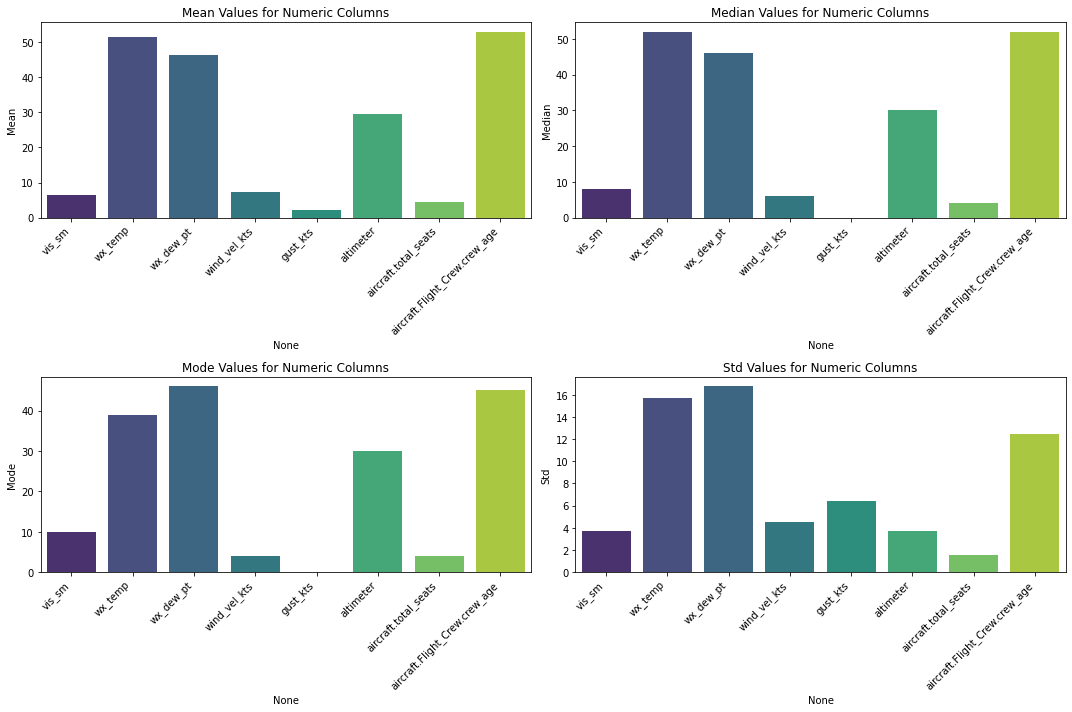

In [76]:
print_stats(spatial_disorientation_fatal_important)

<Figure size 1296x576 with 0 Axes>

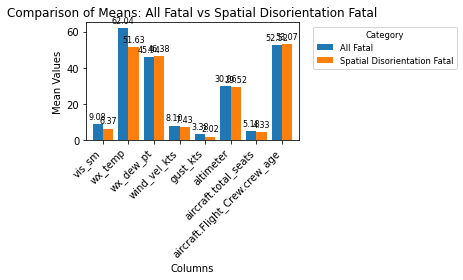


Percentage Difference (SD Fatal vs All Fatal):
vis_sm                          -29.850811
wx_temp                         -16.786747
wx_dew_pt                         0.960029
wind_vel_kts                     -8.283454
gust_kts                        -40.286491
altimeter                        -1.795609
aircraft.total_seats            -16.450187
aircraft.Flight_Crew.crew_age     1.037406
Name: mean, dtype: float64


In [90]:
# Visualize means of all fatal stats vs SD fatal stats
plt.figure(figsize=(18, 8))

all_fatal_means = all_fatal_stats.loc['mean']
sd_fatal_means = SD_fatal_stats.loc['mean']

combined_means = pd.DataFrame({
    'All Fatal': all_fatal_means,
    'Spatial Disorientation Fatal': sd_fatal_means
})

# Plot the combined means
ax = combined_means.plot(kind='bar', width=0.8)

plt.title('Comparison of Means: All Fatal vs Spatial Disorientation Fatal')
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small') 
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8, fontweight='light')

plt.tight_layout()
plt.show()

# Print the percentage difference between the means
percent_diff = ((sd_fatal_means - all_fatal_means) / all_fatal_means) * 100
print("\nPercentage Difference (SD Fatal vs All Fatal):")
print(percent_diff)


<Figure size 1296x576 with 0 Axes>

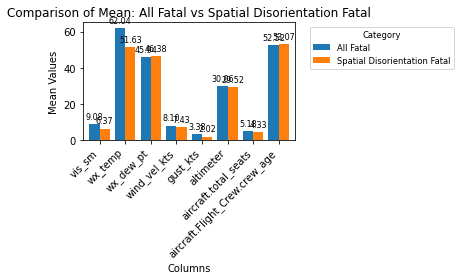


Percentage Difference (Mean, SD Fatal vs All Fatal):
vis_sm                          -29.850811
wx_temp                         -16.786747
wx_dew_pt                         0.960029
wind_vel_kts                     -8.283454
gust_kts                        -40.286491
altimeter                        -1.795609
aircraft.total_seats            -16.450187
aircraft.Flight_Crew.crew_age     1.037406
Name: mean, dtype: float64


<Figure size 1296x576 with 0 Axes>

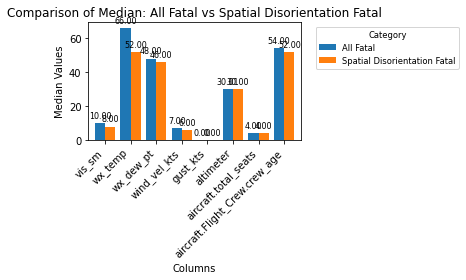


Percentage Difference (Median, SD Fatal vs All Fatal):
vis_sm                          -20.000000
wx_temp                         -21.212121
wx_dew_pt                        -4.166667
wind_vel_kts                    -14.285714
gust_kts                               NaN
altimeter                        -0.033323
aircraft.total_seats              0.000000
aircraft.Flight_Crew.crew_age    -3.703704
Name: median, dtype: float64


<Figure size 1296x576 with 0 Axes>

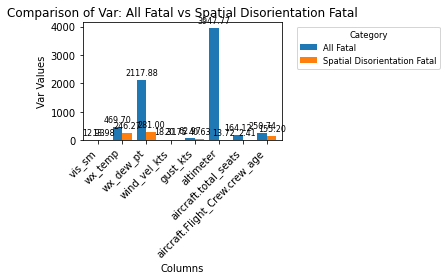


Percentage Difference (Var, SD Fatal vs All Fatal):
vis_sm                            8.128154
wx_temp                         -47.568271
wx_dew_pt                       -86.731928
wind_vel_kts                     13.334775
gust_kts                        -35.486624
altimeter                       -99.652516
aircraft.total_seats            -98.529135
aircraft.Flight_Crew.crew_age   -38.103721
Name: var, dtype: float64


<Figure size 1296x576 with 0 Axes>

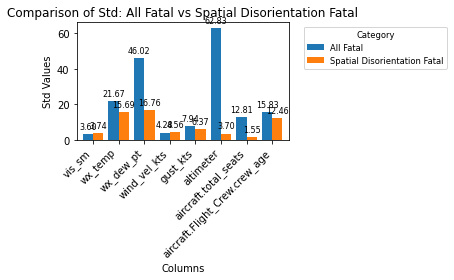


Percentage Difference (Std, SD Fatal vs All Fatal):
vis_sm                            3.984688
wx_temp                         -27.590243
wx_dew_pt                       -63.574636
wind_vel_kts                      6.458806
gust_kts                        -19.679781
altimeter                       -94.105224
aircraft.total_seats            -87.872076
aircraft.Flight_Crew.crew_age   -21.325812
Name: std, dtype: float64


In [91]:
def compare_and_visualize_stats(all_stats, sd_stats, stat_type='mean'):
    plt.figure(figsize=(18, 8))

    all_values = all_stats.loc[stat_type]
    sd_values = sd_stats.loc[stat_type]

    combined_values = pd.DataFrame({
        'All Fatal': all_values,
        'Spatial Disorientation Fatal': sd_values
    })

    # Plot the combined values
    ax = combined_values.plot(kind='bar', width=0.8)

    plt.title(f'Comparison of {stat_type.capitalize()}: All Fatal vs Spatial Disorientation Fatal')
    plt.xlabel('Columns')
    plt.ylabel(f'{stat_type.capitalize()} Values')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8, fontweight='light')

    plt.tight_layout()
    plt.show()

    # Calculate and print the percentage difference
    percent_diff = ((sd_values - all_values) / all_values) * 100
    print(f"\nPercentage Difference ({stat_type.capitalize()}, SD Fatal vs All Fatal):")
    print(percent_diff)

# Usage:
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'mean')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'median')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'var')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'std')

<Figure size 1296x576 with 0 Axes>

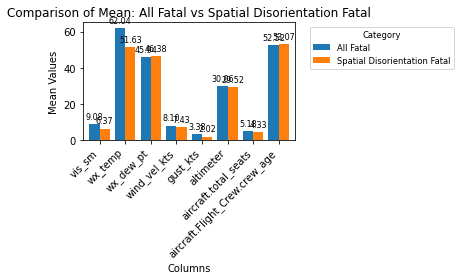


Percentage Difference (Mean, SD Fatal vs All Fatal):
vis_sm                          -29.850811
wx_temp                         -16.786747
wx_dew_pt                         0.960029
wind_vel_kts                     -8.283454
gust_kts                        -40.286491
altimeter                        -1.795609
aircraft.total_seats            -16.450187
aircraft.Flight_Crew.crew_age     1.037406
Name: mean, dtype: float64


<Figure size 1296x576 with 0 Axes>

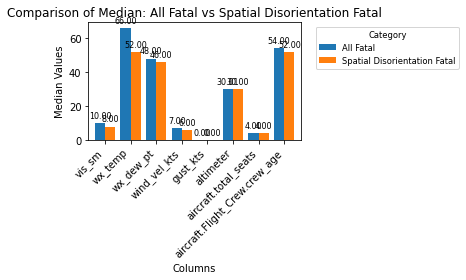


Percentage Difference (Median, SD Fatal vs All Fatal):
vis_sm                          -20.000000
wx_temp                         -21.212121
wx_dew_pt                        -4.166667
wind_vel_kts                    -14.285714
gust_kts                               NaN
altimeter                        -0.033323
aircraft.total_seats              0.000000
aircraft.Flight_Crew.crew_age    -3.703704
Name: median, dtype: float64


<Figure size 1296x576 with 0 Axes>

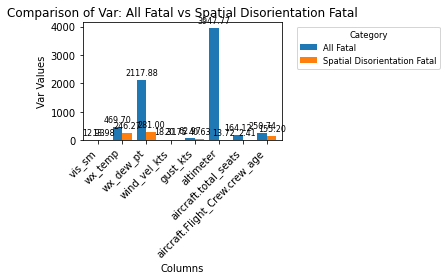


Percentage Difference (Var, SD Fatal vs All Fatal):
vis_sm                            8.128154
wx_temp                         -47.568271
wx_dew_pt                       -86.731928
wind_vel_kts                     13.334775
gust_kts                        -35.486624
altimeter                       -99.652516
aircraft.total_seats            -98.529135
aircraft.Flight_Crew.crew_age   -38.103721
Name: var, dtype: float64


<Figure size 1296x576 with 0 Axes>

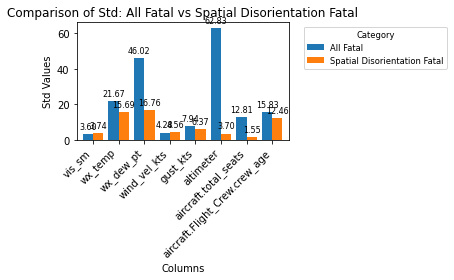


Percentage Difference (Std, SD Fatal vs All Fatal):
vis_sm                            3.984688
wx_temp                         -27.590243
wx_dew_pt                       -63.574636
wind_vel_kts                      6.458806
gust_kts                        -19.679781
altimeter                       -94.105224
aircraft.total_seats            -87.872076
aircraft.Flight_Crew.crew_age   -21.325812
Name: std, dtype: float64


In [92]:
def compare_and_visualize_stats(all_stats, sd_stats, stat_type='mean'):
    plt.figure(figsize=(18, 8))

    all_values = all_stats.loc[stat_type]
    sd_values = sd_stats.loc[stat_type]

    combined_values = pd.DataFrame({
        'All Fatal': all_values,
        'Spatial Disorientation Fatal': sd_values
    })

    # Plot the combined values
    ax = combined_values.plot(kind='bar', width=0.8)

    plt.title(f'Comparison of {stat_type.capitalize()}: All Fatal vs Spatial Disorientation Fatal')
    plt.xlabel('Columns')
    plt.ylabel(f'{stat_type.capitalize()} Values')
    plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title_fontsize='small')
    plt.xticks(rotation=45, ha='right')

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', padding=3, fontsize=8, fontweight='light')

    plt.tight_layout()
    plt.show()

    # Calculate and print the percentage difference
    percent_diff = ((sd_values - all_values) / all_values) * 100
    print(f"\nPercentage Difference ({stat_type.capitalize()}, SD Fatal vs All Fatal):")
    print(percent_diff)

# Usage:
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'mean')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'median')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'var')
compare_and_visualize_stats(all_fatal_stats, SD_fatal_stats, 'std')

<Figure size 864x432 with 0 Axes>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


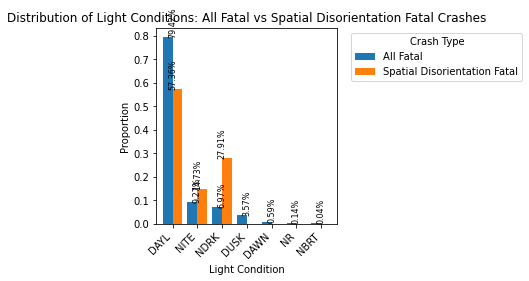


Distribution of Light Conditions:
           All Fatal Spatial Disorientation Fatal
light_cond                                       
DAYL          79.42%                       57.36%
NITE           9.27%                       14.73%
NDRK           6.97%                       27.91%
DUSK           3.57%                         nan%
DAWN           0.59%                         nan%
NR             0.14%                         nan%
NBRT           0.04%                         nan%

Percentage Difference (SD Fatal vs All Fatal):
light_cond
DAYL    -27.766832
NITE     58.801299
NDRK    300.357128
DUSK           NaN
DAWN           NaN
NR             NaN
NBRT           NaN
dtype: float64


In [97]:


light_cond_distribution = pd.DataFrame({
    'All Fatal': all_fatal_important['light_cond'].value_counts(normalize=True),
    'Spatial Disorientation Fatal': spatial_disorientation_fatal_important['light_cond'].value_counts(normalize=True)
})

# Sort the DataFrame by the 'All Fatal' column in descending order
light_cond_distribution = light_cond_distribution.sort_values('All Fatal', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
light_cond_distribution.plot(kind='bar', width=0.8)

plt.title('Distribution of Light Conditions: All Fatal vs Spatial Disorientation Fatal Crashes')
plt.xlabel('Light Condition')
plt.ylabel('Proportion')
plt.legend(title='Crash Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, col in enumerate(light_cond_distribution.columns):
    for j, value in enumerate(light_cond_distribution[col]):
        plt.text(j, value, f'{value:.2%}', ha='center', va='bottom', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# Print the distribution percentages
print("\nDistribution of Light Conditions:")
print(light_cond_distribution.applymap(lambda x: f"{x:.2%}"))

# Calculate and print the percentage difference
percent_diff = ((light_cond_distribution['Spatial Disorientation Fatal'] - light_cond_distribution['All Fatal']) / light_cond_distribution['All Fatal']) * 100
print("\nPercentage Difference (SD Fatal vs All Fatal):")
print(percent_diff)

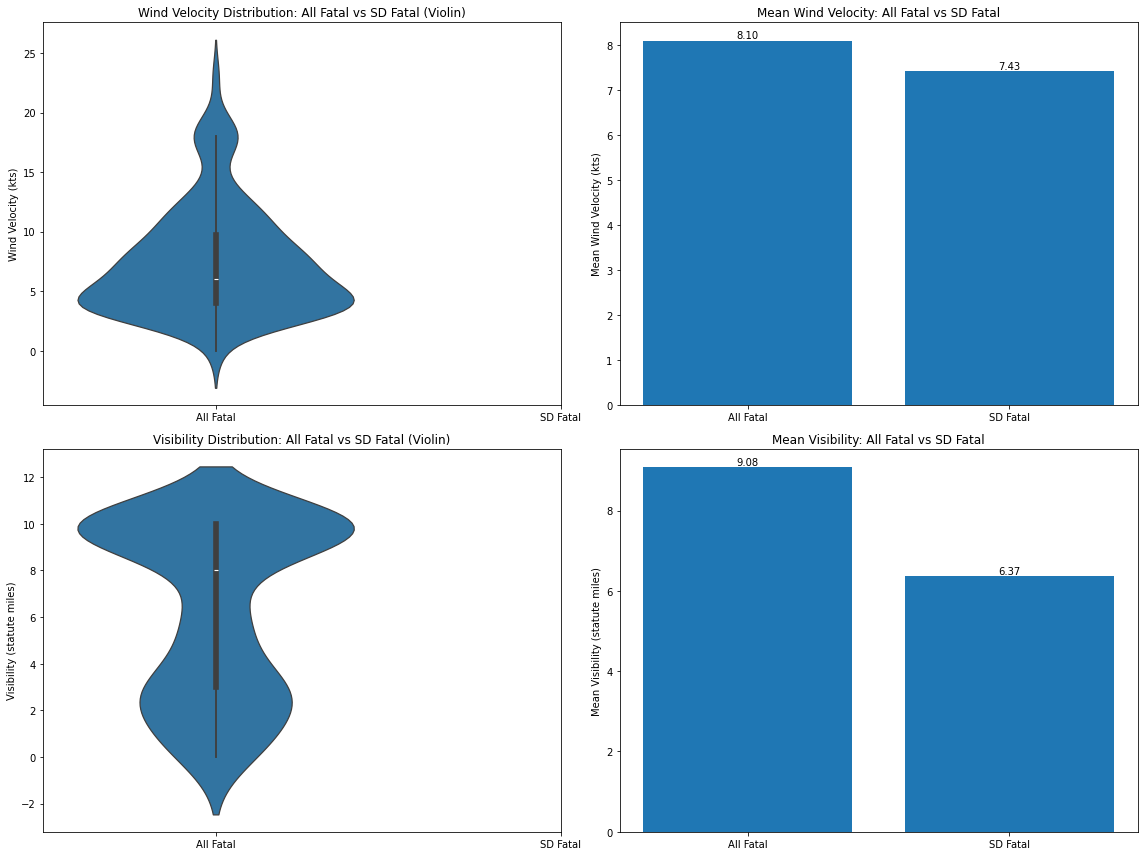

Wind Velocity (kts) Summary Statistics:
count    38936.000000
mean         8.095850
std          4.279122
min          0.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         36.000000
Name: wind_vel_kts, dtype: float64

SD Fatal Wind Velocity (kts) Summary Statistics:
count    214.000000
mean       7.425234
std        4.555502
min        0.000000
25%        4.000000
50%        6.000000
75%        9.750000
max       23.000000
Name: wind_vel_kts, dtype: float64

Visibility (statute miles) Summary Statistics:
count    45970.000000
mean         9.080147
std          3.595708
min          0.000000
25%         10.000000
50%         10.000000
75%         10.000000
max         85.000000
Name: vis_sm, dtype: float64

SD Fatal Visibility (statute miles) Summary Statistics:
count    257.000000
mean       6.369650
std        3.738986
min        0.000000
25%        3.000000
50%        8.000000
75%       10.000000
max       10.000000
Name: vis_sm, dtype: float64


In [100]:
# Create violin plots and bar charts for wind_vel_kts and vis_sm
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Wind Velocity (kts) - Violin Plot
sns.violinplot(ax=ax1, data=[all_fatal_important['wind_vel_kts'], spatial_disorientation_fatal_important['wind_vel_kts']])
ax1.set_title('Wind Velocity Distribution: All Fatal vs SD Fatal (Violin)')
ax1.set_ylabel('Wind Velocity (kts)')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['All Fatal', 'SD Fatal'])

# Wind Velocity (kts) - Bar Chart
wind_means = [all_fatal_important['wind_vel_kts'].mean(), spatial_disorientation_fatal_important['wind_vel_kts'].mean()]
ax2.bar(['All Fatal', 'SD Fatal'], wind_means)
ax2.set_title('Mean Wind Velocity: All Fatal vs SD Fatal')
ax2.set_ylabel('Mean Wind Velocity (kts)')
for i, v in enumerate(wind_means):
    ax2.text(i, v, f'{v:.2f}', ha='center', va='bottom')

# Visibility (statute miles) - Violin Plot
sns.violinplot(ax=ax3, data=[all_fatal_important['vis_sm'], spatial_disorientation_fatal_important['vis_sm']])
ax3.set_title('Visibility Distribution: All Fatal vs SD Fatal (Violin)')
ax3.set_ylabel('Visibility (statute miles)')
ax3.set_xticks([0, 1])
ax3.set_xticklabels(['All Fatal', 'SD Fatal'])

# Visibility (statute miles) - Bar Chart
vis_means = [all_fatal_important['vis_sm'].mean(), spatial_disorientation_fatal_important['vis_sm'].mean()]
ax4.bar(['All Fatal', 'SD Fatal'], vis_means)
ax4.set_title('Mean Visibility: All Fatal vs SD Fatal')
ax4.set_ylabel('Mean Visibility (statute miles)')
for i, v in enumerate(vis_means):
    ax4.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Calculate and print summary statistics
print("Wind Velocity (kts) Summary Statistics:")
print(all_fatal_important['wind_vel_kts'].describe())
print("\nSD Fatal Wind Velocity (kts) Summary Statistics:")
print(spatial_disorientation_fatal_important['wind_vel_kts'].describe())

print("\nVisibility (statute miles) Summary Statistics:")
print(all_fatal_important['vis_sm'].describe())
print("\nSD Fatal Visibility (statute miles) Summary Statistics:")
print(spatial_disorientation_fatal_important['vis_sm'].describe())

Summary Table: All Fatal vs SD Fatal Accidents
                         Metric All Fatal SD Fatal
                Total Accidents  47258.00   260.00
       Mean Wind Velocity (kts)      8.10     7.43
Mean Visibility (statute miles)      9.08     6.37
                NDRK Percentage      6.94    27.69
                NITE Percentage      9.24    14.62


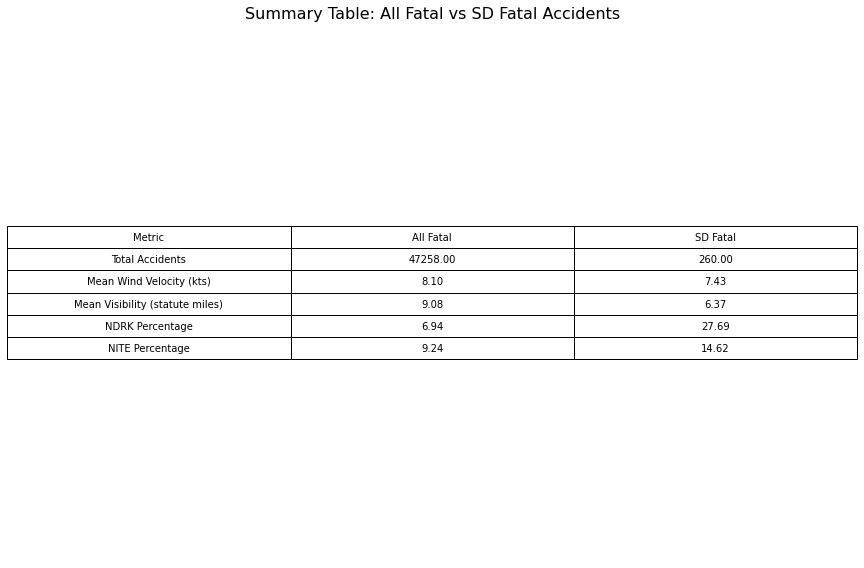


Percentage increase in NDRK conditions for SD Fatal accidents: 298.75%
Percentage increase in NITE conditions for SD Fatal accidents: 58.16%


In [105]:
# Calculate percentages for NDRK and NITE
def calc_night_percentages(df):
    total = len(df)
    ndrk_pct = (df['light_cond'] == 'NDRK').sum() / total * 100
    nite_pct = (df['light_cond'] == 'NITE').sum() / total * 100
    return ndrk_pct, nite_pct

all_fatal_ndrk, all_fatal_nite = calc_night_percentages(all_fatal_important)
sd_fatal_ndrk, sd_fatal_nite = calc_night_percentages(spatial_disorientation_fatal_important)

# Create a summary table of key findings
summary_data = {
    'Metric': ['Total Accidents', 'Mean Wind Velocity (kts)', 'Mean Visibility (statute miles)', 
               'NDRK Percentage', 'NITE Percentage'],
    'All Fatal': [
        len(all_fatal_important),
        all_fatal_important['wind_vel_kts'].mean(),
        all_fatal_important['vis_sm'].mean(),
        all_fatal_ndrk,
        all_fatal_nite
    ],
    'SD Fatal': [
        len(spatial_disorientation_fatal_important),
        spatial_disorientation_fatal_important['wind_vel_kts'].mean(),
        spatial_disorientation_fatal_important['vis_sm'].mean(),
        sd_fatal_ndrk,
        sd_fatal_nite
    ]
}

summary_df = pd.DataFrame(summary_data)

# Format the numeric columns
summary_df['All Fatal'] = summary_df['All Fatal'].apply(lambda x: f'{x:.2f}' if isinstance(x, float) else x)
summary_df['SD Fatal'] = summary_df['SD Fatal'].apply(lambda x: f'{x:.2f}' if isinstance(x, float) else x)

# Display the summary table
print("Summary Table: All Fatal vs SD Fatal Accidents")
print(summary_df.to_string(index=False))

# Visualize the summary table
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure height
ax.axis('off')
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.5)
plt.title("Summary Table: All Fatal vs SD Fatal Accidents", fontsize=16)
plt.tight_layout()
plt.show()

# Calculate and display percentage increases for NDRK and NITE
ndrk_increase = (sd_fatal_ndrk - all_fatal_ndrk) / all_fatal_ndrk * 100
nite_increase = (sd_fatal_nite - all_fatal_nite) / all_fatal_nite * 100

print(f"\nPercentage increase in NDRK conditions for SD Fatal accidents: {ndrk_increase:.2f}%")
print(f"Percentage increase in NITE conditions for SD Fatal accidents: {nite_increase:.2f}%")